In [2]:
import pandas as pd
import numpy as np

df_t_loan=pd.read_csv('t_loan.csv')
df_t_loan_sum=pd.read_csv('t_loan_sum.csv')
df_t_order=pd.read_csv('t_order.csv')
df_t_user=pd.read_csv('t_user.csv')
df_t_click=pd.read_csv('t_click.csv')

In [111]:
df_t_user.uid.unique()/len(df_t_user)

array([ 0.28912114,  0.85950568,  0.57070324, ...,  0.17750816,
        0.66724913,  0.10995351])

In [4]:
import datetime
import time
def parse_date(date_row):
    year, month, day=date_row.split()[0].split('-')
    dayOfWeek=datetime.date(int(year),int(month),int(day)).weekday()
    return pd.Series([month, day, dayOfWeek])
def df_parse_date(df,date_c='loan_time'):
    df['month'],df['day'],df['weekday']=pd.Series([0]*df.shape[0]),pd.Series([0]*df.shape[0]),pd.Series([0]*df.shape[0])
    df[['month','day','weekday']]=df[date_c].apply(lambda x:parse_date(x))

df_parse_date(df_t_loan)
df_parse_date(df_t_order,'buy_time')
df_parse_date(df_t_click,'click_time')

In [32]:
df_t_click.head()

,uid,click_time,pid,param,month,day,weekday
0,12177,2016-10-04 12:22:30,1,19,10,04,1
1,29226,2016-10-04 12:18:42,6,1,10,04,1
2,37351,2016-10-04 12:18:41,10,16,10,04,1
3,82053,2016-10-04 12:18:16,1,40,10,04,1
4,82053,2016-10-04 12:18:46,1,40,10,04,1


In [7]:
#save the date parsed data
import csv

df_t_loan.to_csv('loan_parsed.csv',sep=',')
df_t_order.to_csv('order_parsed.csv',sep=',')
df_t_click.to_csv('click_parsed.csv',sep=',')

In [2]:
import pandas as pd
df_t_loan=pd.read_csv('loan_parsed.csv')
df_t_order=pd.read_csv('order_parsed.csv')
df_t_click=pd.read_csv('click_parsed.csv')


In [186]:
order_grouped=df_t_order.groupby(['uid','cate_id','month'], as_index=False).cost.mean()
pivot_order_cate=order_grouped.pivot_table(index=['uid','month'],columns='cate_id', values='cost')
# or use unstack
#order_grouped.unstack('cate_id')
for i in range(1,45):
    pivot_order_cate.rename(columns={i:'cate_'+str(i)}, inplace=True)
    
pivot_order_cate=pivot_order_cate.fillna(0)
#get the flattened table
flatten=pd.DataFrame(pivot_order_cate.to_records())

In [187]:
pivot_order_cate.head()

cate_id      cate_1    cate_2    cate_3  cate_4  cate_5  cate_6  cate_7  \
uid month                                                                 
1   8      0.000000  0.000000  0.000000     0.0     0.0     0.0     0.0   
    9      0.000000  0.000000  0.000000     0.0     0.0     0.0     0.0   
    10     9.852612  0.000000  0.000000     0.0     0.0     0.0     0.0   
    11     0.000000  0.000000  0.000000     0.0     0.0     0.0     0.0   
2   8      0.000000  5.048922  6.315207     0.0     0.0     0.0     0.0   

cate_id    cate_8  cate_9  cate_10   ...      cate_35   cate_36  cate_37  \
uid month                            ...                                   
1   8         0.0     0.0      0.0   ...     0.000000  0.000000      0.0   
    9         0.0     0.0      0.0   ...     3.868732  0.000000      0.0   
    10        0.0     0.0      0.0   ...     0.000000  0.000000      0.0   
    11        0.0     0.0      0.0   ...     0.000000  5.949272      0.0   
2   8         0.0     0.0      0.0   ...     0.000000  0.000000      0.0   

cate_id    cate_38  cate_39  cate_40  cate_41  cate_42  cate_43  cate_44  
uid month                                                                 
1   8          0.0      0.0  3.29203      0.0      0.0      0.0      0.0  
    9          0.0      0.0  0.00000      0.0      0.0      0.0      0.0  
    10         0.0      0.0  0.00000      0.0      0.0      0.0      0.0  
    11         0.0      0.0  0.00000      0.0      0.0      0.0      0.0  
2   8          0.0      0.0  0.00000      0.0      0.0      0.0      0.0  

[5 rows x 44 columns]

In [695]:
#add a column in user table to see if the user loan more than once.
loan_times=df_t_loan.groupby(['uid'], as_index=False).loan_time.count()
user_loan=df_t_user.merge(loan_times, how='left', on=['uid'])
user_loan.fillna(0, inplace=True)
df_t_user['multi_loans']=df_t_user.merge(user_loan, how='left',on=['uid'])['loan_time'].apply(lambda x:int(x>1))
df_t_user['is_loaner']=df_t_user.merge(user_loan, how='left',on=['uid'])['loan_time'].apply(lambda x:int(x>0))

In [696]:
df_t_user.head()

,uid,age,sex,active_date,limit,is_loaner,multi_loans
0,26308,30,1,2016-02-16,5.974677,1,1
1,78209,40,1,2016-02-21,5.292154,0,0
2,51930,35,1,2016-04-19,6.292055,1,0
3,10113,25,1,2016-03-12,6.292055,0,0
4,17067,35,1,2016-02-16,5.974677,0,0


In [287]:
click_count=dt_t_click.groupby

,Unnamed: 0,uid,click_time,pid,param,month,day,weekday
0,0,12177,2016-10-04 12:22:30,1,19,10,4,1
1,1,29226,2016-10-04 12:18:42,6,1,10,4,1
2,2,37351,2016-10-04 12:18:41,10,16,10,4,1
3,3,82053,2016-10-04 12:18:16,1,40,10,4,1
4,4,82053,2016-10-04 12:18:46,1,40,10,4,1


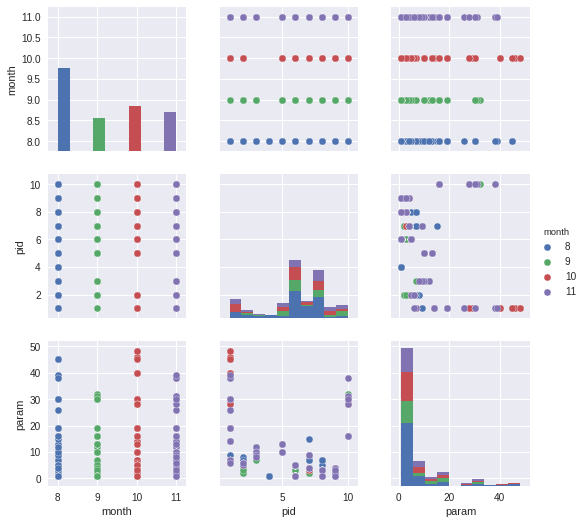

In [306]:
df12177=df_t_click[df_t_click['uid']==12177][['month','pid','param']]
#melt=pd.melt(df12177, id_vars=['month'], value_vars = ['pid','param'])
#g=sns.factorplot(x='pid', y='param',hue='month',data=df12177, kind='strip', jitter=True, size=7, aspect=7)
sns.pairplot(df12177,hue='month')
plt.show()

In [449]:
df_t_click.head()

,Unnamed: 0,uid,click_time,pid,param,month,day,weekday
0,0,12177,2016-10-04 12:22:30,1,19,10,4,1
1,1,29226,2016-10-04 12:18:42,6,1,10,4,1
2,2,37351,2016-10-04 12:18:41,10,16,10,4,1
3,3,82053,2016-10-04 12:18:16,1,40,10,4,1
4,4,82053,2016-10-04 12:18:46,1,40,10,4,1


In [459]:
click_count=df_t_click.groupby(['uid','month','param'], as_index=False)['click_time'].count()
pivot_click_count=click_count.pivot_table(index=['uid','month'],columns='param', values='click_time')
# or use unstack
#order_grouped.unstack('cate_id')

for i in range(1,49):
    pivot_click_count.rename(columns={i:'param_'+str(i)}, inplace=True)
    
pivot_click_count=pivot_click_count.fillna(0)
#get the flattened table
flatten_click_count=pd.DataFrame(pivot_click_count.to_records())

In [460]:
flatten_click_count.head()

,uid,month,param_1,param_2,param_3,param_4,param_5,param_6,param_7,param_8,...,param_39,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48
0,1,8,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,9,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,10,18.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,11,12.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,8,9.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,0.0,3.0


In [697]:
user_loan8=df_t_user.merge(flatten[flatten['month']==8], how='left', on=['uid'])
user_loan8=user_loan8.merge(flatten_click_count[flatten_click_count['month']==8],how='left', on=['uid'])
loan_avg8=loan_avg[loan_avg['month']==9]
user_loan8=user_loan8.merge(loan_avg8, how='left', on=['uid'])
user_loan8.fillna(0, inplace=True)
user_loan8.drop(['uid','active_date','limit','month_x','month_y','month','month'],axis=1, inplace=True)
user_loan8.head()

,age,sex,is_loaner,multi_loans,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
0,30,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.633695
1,40,1,0,0,2.106085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,35,1,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.405333
3,25,1,0,0,2.428956,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,35,1,0,0,2.630798,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000


In [698]:
user_loan9=df_t_user.merge(flatten[flatten['month']==9], how='left', on=['uid'])
user_loan9=user_loan9.merge(flatten_click_count[flatten_click_count['month']==9],how='left', on=['uid'])
#user_loan9.fillna(0, inplace=True)

loan_avg9=loan_avg[loan_avg['month']==10]
user_loan9=user_loan9.merge(loan_avg9, how='left', on=['uid']).fillna(0)
user_loan9.drop(['uid','active_date','limit','month_x','month_y','month'],axis=1, inplace=True)
user_loan9.head()

,age,sex,is_loaner,multi_loans,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
0,30,1,1,1,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.507921
1,40,1,0,0,3.435687,0.0,3.932263,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,35,1,1,0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,25,1,0,0,2.935945,0.0,0.000000,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,35,1,0,0,1.763397,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [699]:
user_loan10=df_t_user.merge(flatten[flatten['month']==10], how='left', on=['uid'])
user_loan10=user_loan10.merge(flatten_click_count[flatten_click_count['month']==10],how='left', on=['uid'])

loan_avg10=loan_avg[loan_avg['month']==11]
user_loan10=user_loan10.merge(loan_avg10, how='left', on=['uid']).fillna(0)
user_loan10.drop(['uid','active_date','limit','month_x','month_y','month'],axis=1, inplace=True)
user_loan10.head()

,age,sex,is_loaner,multi_loans,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
0,30,1,1,1,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.464797
1,40,1,0,0,1.484222,0.0,6.023987,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,35,1,1,0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,25,1,0,0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,35,1,0,0,3.038545,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [700]:
frames=[user_loan8, user_loan9, user_loan10]
train=pd.concat(frames)
train.head()

,age,sex,is_loaner,multi_loans,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
0,30,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.633695
1,40,1,0,0,2.106085,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,35,1,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.405333
3,25,1,0,0,2.428956,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,35,1,0,0,2.630798,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000


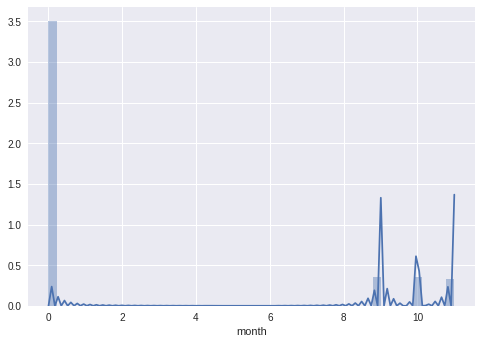

In [493]:
sns.distplot(train['month'])
plt.show()

In [701]:
user_loan11=df_t_user.merge(flatten[flatten['month']==11], how='left', on=['uid'])
user_loan11.drop(['month'],axis=1,inplace=True)
user_loan11=user_loan11.merge(flatten_click_count[flatten_click_count['month']==11],how='left', on=['uid']).fillna(0)
#user_loan11.fillna(0, inplace=True)
#loan_avg11=loan_avg[loan_avg['month']==11]
user_loan11.drop(['uid','active_date','limit','month'],axis=1,inplace=True)
user_loan11.head()

,age,sex,is_loaner,multi_loans,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,...,param_39,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48
0,30,1,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40,1,0,0,2.626130,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,35,1,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,25,1,0,0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,35,1,0,0,4.517044,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [539]:
user_loan11.columns

Index(['age', 'sex', 'is_loaner', 'cate_1', 'cate_2', 'cate_3', 'cate_4',
       'cate_5', 'cate_6', 'cate_7', 'cate_8', 'cate_9', 'cate_10', 'cate_11',
       'cate_12', 'cate_13', 'cate_14', 'cate_15', 'cate_16', 'cate_17',
       'cate_18', 'cate_19', 'cate_20', 'cate_21', 'cate_22', 'cate_23',
       'cate_24', 'cate_25', 'cate_26', 'cate_27', 'cate_28', 'cate_29',
       'cate_30', 'cate_31', 'cate_32', 'cate_33', 'cate_34', 'cate_35',
       'cate_36', 'cate_37', 'cate_38', 'cate_39', 'cate_40', 'cate_41',
       'cate_42', 'cate_43', 'cate_44', 'param_1', 'param_2', 'param_3',
       'param_4', 'param_5', 'param_6', 'param_7', 'param_8', 'param_9',
       'param_10', 'param_11', 'param_12', 'param_13', 'param_14', 'param_15',
       'param_16', 'param_17', 'param_18', 'param_19', 'param_20', 'param_21',
       'param_22', 'param_23', 'param_24', 'param_25', 'param_26', 'param_27',
       'param_28', 'param_29', 'param_30', 'param_31', 'param_32', 'param_33',
       'param_34', '

In [362]:
train['cate_26'].describe()

count    272979.000000
mean         11.560977
std         939.967394
min           0.000000
25%           0.000000
50%           0.000000
75%           2.133055
max      226781.792040
Name: cate_26, dtype: float64

In [ ]:
#drop records with hight cost and no loan
print('before deleting, there are:' % (train.shape))
train.drop(train[(train.loc[:,'cate_1':'cate_44']>500).any(axis=1) & (train['loan_amount']==0)].index, inplace=True)
print('after deleting, there are:' % (train.shape))

In [383]:
train.drop(['cate_4','cate_26'], axis=1, inplace=True)

In [384]:
train.head()

,age,sex,is_loaner,cate_1,cate_2,cate_3,cate_5,cate_6,cate_7,cate_8,...,cate_36,cate_37,cate_38,cate_39,cate_40,cate_41,cate_42,cate_43,cate_44,loan_amount
0,30,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,4.633695
1,40,1,0,2.106085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,35,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,4.501092,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,6.405333
3,25,1,0,2.428956,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,2.722706,0.0,0.0,0.0,2.520309,0.000000
4,35,1,0,2.630798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.766518,0.000000


In [385]:
train.shape

(272979, 46)

In [392]:
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import metrics
import seaborn as sns
import math
def clf_model(model, xtrain, xtest, ytrain, ytest):  #roc-auc and recall scores to validate model
    pass
def data_split(data):
    x=data.loc[:,data.columns!='loan_amount']
    y=data['loan_amount']
    xtrain, xtest, ytrain, ytest=train_test_split(x,y, test_size=0.3, random_state=42)
    print('length of training data')
    print(len(xtrain))
    print('length of test data')
    print(len(xtest))
    return(xtrain,xtest,ytrain, ytest)    
xtrain, xtest, ytrain, ytest=data_split(train[indices1])
rmse_est={}
for est in range(360,500,20):
    clf=RandomForestRegressor(n_estimators=100)
    clf.fit(xtrain, ytrain.values.ravel())
    ypred=np.array(clf.predict(xtest))
    rmse=math.sqrt(np.mean((np.array(ytest)-ypred)**2))
    imp=sorted(zip(user_loan8.columns, clf.feature_importances_), key=lambda tup:tup[1], reverse=True)
    print('rmse: {0}-est: {1}'.format(str(rmse), est))
    rmse_est[rmse]=est

length of training data
63695
length of test data
27298
rmse: 1.691639416203925-est: 360
rmse: 1.6942742343819688-est: 380
rmse: 1.6944545537479607-est: 400
rmse: 1.6920736480291942-est: 420
rmse: 1.6941565370178804-est: 440
rmse: 1.693274461600787-est: 460
rmse: 1.695991957964543-est: 480


In [439]:
indices1=train[train['loan_amount']>0].index

In [445]:
train['age'].unique()

array([30, 40, 35, 25, 45, 50, 20])

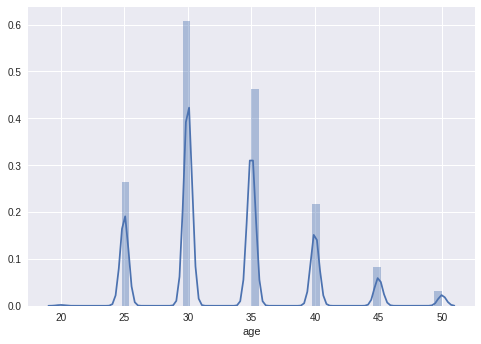

In [446]:
sns.distplot(train['age'])
plt.show()

In [550]:
xtrain, xtest, ytrain, ytest=data_split(user_loan8)
clf=RandomForestRegressor(n_estimators=400)
clf.fit(xtrain, ytrain.values.ravel())
ypred=clf.predict(xtest)
rmse=math.sqrt(np.mean((np.array(ytest)-ypred)**2))
rmse

length of training data
63695
length of test data
27298


1.6255774047366407

,Unnamed: 0,uid,click_time,pid,param,month,day,weekday
0,0,12177,2016-10-04 12:22:30,1,19,10,4,1
1,1,29226,2016-10-04 12:18:42,6,1,10,4,1
2,2,37351,2016-10-04 12:18:41,10,16,10,4,1
3,3,82053,2016-10-04 12:18:16,1,40,10,4,1
4,4,82053,2016-10-04 12:18:46,1,40,10,4,1


In [ ]:
train['loan_amount'].hist()
plt.show()

length of training data
63695
length of test data
27298


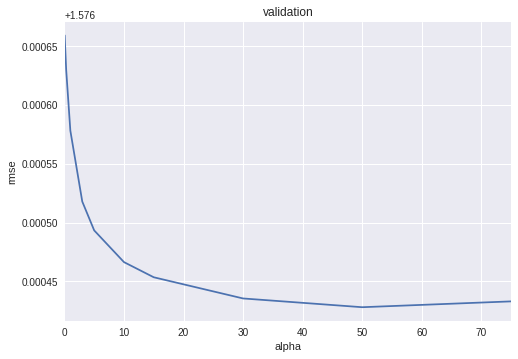

In [598]:
#linear models - ridge
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score
def rmse_cv(model):
    rmse=np.sqrt(-cross_val_score(model, xtrain, ytrain, scoring='neg_mean_squared_error', cv=5))
    return rmse
model_ridge=Ridge()
xtrain, xtest, ytrain, ytest=data_split(user_loan8)
alphas=[0.05, 0.1, 0.3, 1, 3, 5,10,15,30,50,75]
cv_ridge=[rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge=pd.Series(cv_ridge, index=alphas)
cv_ridge.min()
cv_ridge.plot(title='validation')
plt.xlabel('alpha')
plt.ylabel('rmse')
plt.show()

In [566]:
cv_ridge

0.05     0.386382
0.10     0.386378
0.30     0.386363
1.00     0.386323
3.00     0.386258
5.00     0.386227
10.00    0.386195
15.00    0.386184
30.00    0.386175
50.00    0.386172
75.00    0.386170
dtype: float64

In [588]:

model_ridge1=Ridge(alpha=100)
model_ridge1.fit(xtrain,ytrain)
ypred=model_ridge1.predict(xtest)
rmse=math.sqrt(np.mean((np.array(ytest)-ypred)**2))
rmse

0.38805679577407837

In [627]:
user_loan8_predictors[['cate_26']].describe()

,cate_26
count,90993.000000
mean,0.644753
std,0.982800
min,0.000000
25%,0.000000
50%,0.000000
75%,2.155504
max,2.200000


In [632]:
#tried remove some params based on multicollinear  ->> rmse not reduced a lot
removed=['param_3','param_13', 'param_19', 'param_34','param_38', 'param_39','param_40','param45']
predictors=[x for x in user_loan8.columns if x not in removed]
user_loan8_predictors=user_loan8[predictors]
user_loan8_predictors=user_loan8_predictors[user_loan8_predictors['loan_amount']>0]

In [652]:
indices1=user_loan8[user_loan8['loan_amount']>0].index
indices0=user_loan8[user_loan8['loan_amount']==0].index
user_loan8_1=user_loan8[user_loan8['loan_amount']>0]

In [674]:
user_loan8.describe()

,age,sex,is_loaner,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
count,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.0,90993.000000,90993.000000,90993.000000,...,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000,90993.000000
mean,32.986384,1.138340,0.280813,1.393968,0.093706,0.336402,0.0,0.004958,0.268401,0.067925,...,0.254195,0.000055,0.000044,0.000066,0.349390,0.396239,0.006176,0.004737,0.029387,1.219504
std,5.794369,0.345259,0.449399,3.806798,0.640448,1.655078,0.0,0.097069,2.119866,0.563520,...,3.719623,0.010995,0.008120,0.008120,1.956923,2.191951,0.140121,0.116122,0.539961,2.212568
min,20.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,1.000000,2.429445,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,2.000000,1.000000,603.914244,22.999961,101.738170,0.0,2.964193,336.742181,26.955609,...,468.000000,3.000000,2.000000,1.000000,201.000000,81.000000,24.000000,16.000000,64.000000,7.584062


In [680]:
user_loan8['is_loaner']=user_loan8['loan_amount']>0

,age,sex,is_loaner,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,...,param_40,param_41,param_42,param_43,param_44,param_45,param_46,param_47,param_48,loan_amount
0,30,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.633695
1,40,1,0,2.106085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,35,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.405333
3,25,1,0,2.428956,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,35,1,0,2.630798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.000000


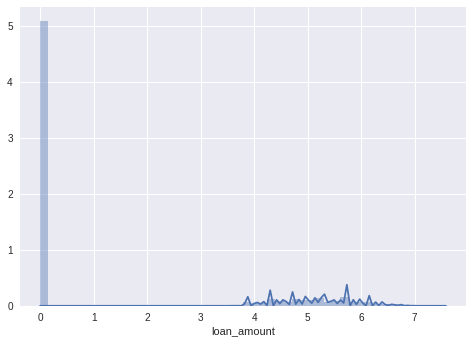

In [679]:
sns.distplot(train['loan_amount'])
plt.show()

In [645]:
uid0=df_t_user.loc[indices0,'uid']

In [678]:
len(user_loan8[user_loan8['loan_amount']>0])/len(user_loan8)

0.23768861340982272

length of training data
63695
length of test data
27298


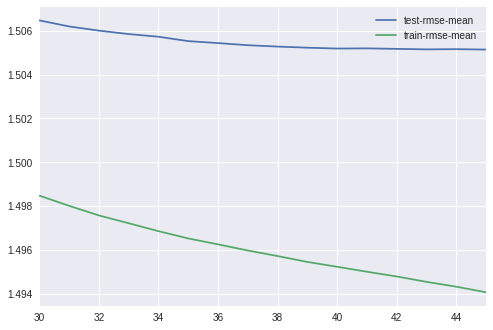

In [709]:
import xgboost as xgb
xtrain, xtest, ytrain, ytest=data_split(user_loan8)
#xtrain=user_loan8.drop(['loan_amount'])
#ytrain=user_loan8['loan_amount']
#xtest=user_loan9.loc[:,:'cate_44']
#ytest=user_loan9['loan_amount']
dtrain=xgb.DMatrix(xtrain, label=ytrain)
dtest=xgb.DMatrix(xtest)
params={'max_depth':3, 'eta':0.1}#, 'n_estimators':100}
model=xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,['test-rmse-mean','train-rmse-mean']].plot()
plt.show()

length of training data
15139
length of test data
6489


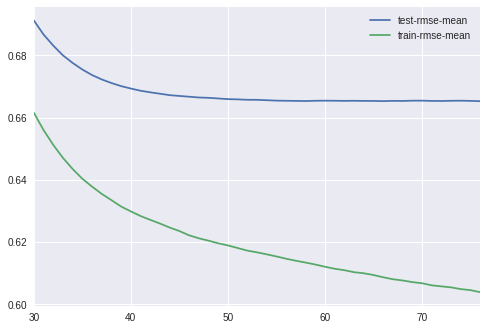

In [653]:
#xgboost
import xgboost as xgb
xtrain, xtest, ytrain, ytest=data_split(user_loan8_1)
#xtrain=user_loan8.drop(['loan_amount'])
#ytrain=user_loan8['loan_amount']
#xtest=user_loan9.loc[:,:'cate_44']
#ytest=user_loan9['loan_amount']
dtrain=xgb.DMatrix(xtrain, label=ytrain)
dtest=xgb.DMatrix(xtest)
params={'max_depth':5, 'eta':0.1, 'n_estimators':200}
model=xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,['test-rmse-mean','train-rmse-mean']].plot()
plt.show()

length of training data
191085
length of test data
81894


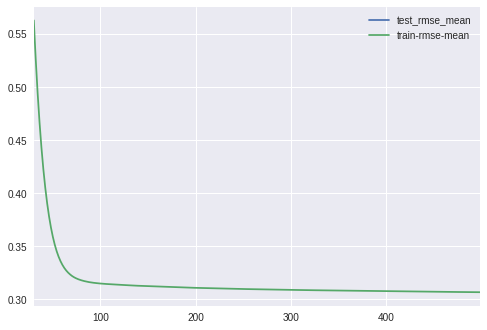

In [494]:
import xgboost as xgb
xtrain, xtest, ytrain, ytest=data_split(train)
#xtrain=user_loan8.drop(['loan_amount'])
#ytrain=user_loan8['loan_amount']
#xtest=user_loan9.loc[:,:'cate_44']
#ytest=user_loan9['loan_amount']
dtrain=xgb.DMatrix(xtrain, label=ytrain)
dtest=xgb.DMatrix(xtest)
params={'max_depth':3, 'eta':0.05}
model=xgb.cv(params, dtrain, num_boost_round=500, early_stopping_rounds=100)
model.loc[30:,['test_rmse_mean','train-rmse-mean']].plot()
plt.show()

In [654]:
model_xgb=xgb.XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1)
model_xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=200, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

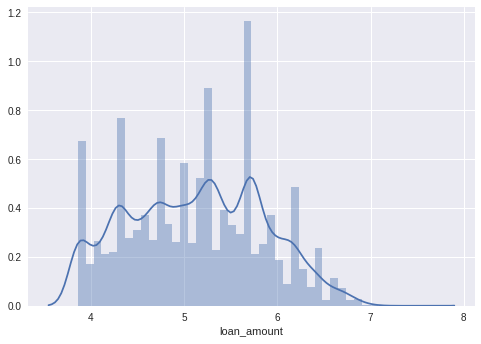

In [423]:
sns.distplot(ytrain[ytrain>0])
plt.show()

In [655]:
user_loan11_1=user_loan11.loc[indices1,:]

In [656]:
ypred=model_xgb.predict(user_loan11_1)

In [657]:
ypred

array([ 4.83605814,  5.54206038,  5.29870272, ...,  4.87423277,
        5.01830769,  4.91368675], dtype=float32)

In [658]:
user_loan11_dummy.head()

,uid,age,sex,active_date,limit,is_loaner,month,cate_1,cate_2,cate_3,...,cate_35,cate_36,cate_37,cate_38,cate_39,cate_40,cate_41,cate_42,cate_43,cate_44
0,26308,30,1,2016-02-16,5.974677,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78209,40,1,2016-02-21,5.292154,0,11.0,2.626130,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51930,35,1,2016-04-19,6.292055,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10113,25,1,2016-03-12,6.292055,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17067,35,1,2016-02-16,5.974677,0,11.0,4.517044,0.0,0.0,...,0.0,3.348419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [662]:
len(ypred)

21628

In [663]:
len(uid1)

21628

In [665]:
uid1=user_loan11_dummy.loc[indices1,'uid']
uid0=user_loan11_dummy.loc[indices0,'uid']
ypred0=np.zeros(uid0.shape[0])
result_1=pd.DataFrame({'uid':uid1, 'ypred':ypred})
result_0=pd.DataFrame({'uid':uid0, 'ypred':ypred0})
results=[result_1,result_0]
result=pd.concat(results)
result.to_csv('result3.csv', sep=',')

In [402]:
cv_ridge

0.05     1.600236
0.10     1.600234
0.30     1.600227
1.00     1.600211
3.00     1.600191
5.00     1.600182
10.00    1.600172
15.00    1.600167
30.00    1.600161
50.00    1.600165
75.00    1.600179
dtype: float64

In [ ]:
#lasso
model_lasso=LassoCV(alphas=[1,0.1,0.001,0.0005])
rmse_cv(model_lasso).mean()
coef=pd.Series(model_lasso.coef_, index=xtrain.columns)
print('lasso picked' + str(sum(coef!=0)) + 'variables and eliminated the other')

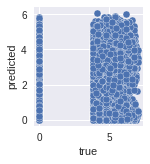

In [318]:
predicted=pd.DataFrame({'true':ytest, 'predicted':ypred})
sns.pairplot(data=predicted, x_vars='true', y_vars='predicted')
plt.show()

In [ ]:
#hyper parameter selection

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_seelction import GridSearchCV
param_grid={'n_estimators':[200,500],
           'max_depth':[3, None],
           'max_features':[1,3,5,10],
           'min_samples_split':[2,5,10],
           'min_samples_leaf':[1,3,10],
           'bootstrap':[True, False]}

model=RandomForestRegressor(random_state=0)
grid=GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid.fit(xtrain, ytrain)
print(grid.best_score_)
print(grid.best_params_)

In [ ]:
regressor=RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, min_samples_leaf=1,
                               min_samples_split=2, bootstrap=False)
regressor.fit(xtrain, ytrain)

In [269]:
user_loan11_dummy=df_t_user.merge(flatten[flatten['month']==11], how='left', on=['uid'])

In [270]:
user_loan11_dummy.head()

,uid,age,sex,active_date,limit,is_loaner,month,cate_1,cate_2,cate_3,...,cate_35,cate_36,cate_37,cate_38,cate_39,cate_40,cate_41,cate_42,cate_43,cate_44
0,26308,30,1,2016-02-16,5.974677,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,78209,40,1,2016-02-21,5.292154,0,11.0,2.626130,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51930,35,1,2016-04-19,6.292055,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10113,25,1,2016-03-12,6.292055,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17067,35,1,2016-02-16,5.974677,0,11.0,4.517044,0.0,0.0,...,0.0,3.348419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [388]:
user_loan11.drop(['cate_4','cate_26'], axis=1, inplace=True)

In [551]:
#clf=RandomForestRegressor(n_estimators=380)
#clf.fit(xtrain, ytrain.values.ravel())
ypred=clf.predict(user_loan11)

In [552]:
ypred

array([ 3.77026053,  0.13162127,  0.        , ...,  3.56446054,
        4.22192956,  0.0861965 ])

In [553]:
results=pd.DataFrame({'uid':user_loan11_dummy['uid'],'loan':ypred})

In [417]:
results[results['loan']<0]

,loan,uid


In [554]:
results.to_csv('results3.csv',sep=',')

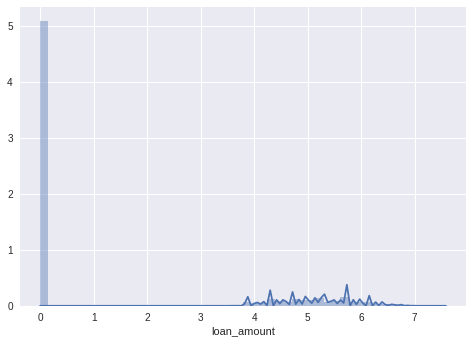

In [564]:
sns.distplot(train['loan_amount'])
plt.show()

In [283]:
import csv
results.to_csv('results2.csv',sep=',')
train.to_csv('train_data.csv', sep=',')
user_loan11.to_csv('test_data.csv', sep=',')

In [468]:
user_loan8.to_csv('loan8_data.csv', sep=',')

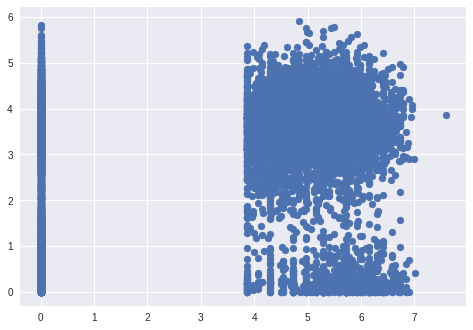

In [261]:
#plot predict
y_pred=clf.predict(xtest)
plt.scatter(x=ytest, y=y_pred)
plt.show()

In [ ]:
from sklearn.resemble import 

In [180]:
order_cate_avg=df_t_order.groupby(['uid','cate_id','month'], as_index=False).cost.mean()

In [15]:
df_t_user=pd.read_csv('t_user.csv')
df_t_user.head(5)

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


In [4]:
#merge table
df_t_order['cost']=df_t_order['price']*df_t_order['qty']
order_loan=df_t_order[['uid','cate_id','discount','month','day','weekday','cost']].merge(\
                            df_t_loan[['uid','loan_amount','plannum','month','day']], how='left', on=['uid', 'month','day'])
#order_loan_click=order_loan.merge(df_t_click[['uid','pid','param','month','day']], how='left',on=['uid', 'month','day'])

In [105]:
df_t_order.dropna(axis=0,inplace=True)

In [108]:
df_t_order['cost']=df_t_order['price']*df_t_order['qty']

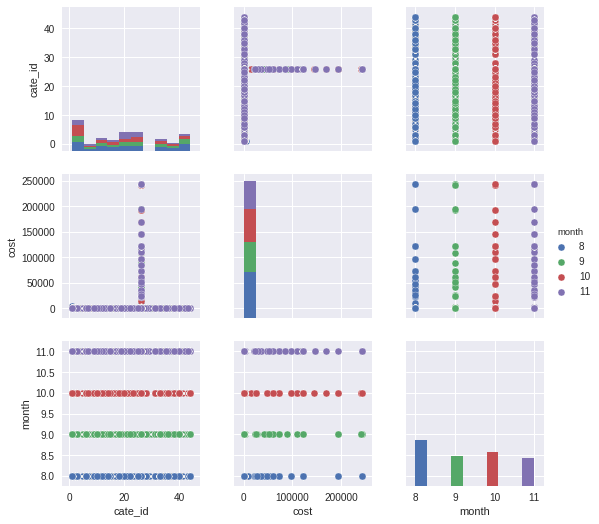

In [110]:
import seaborn as sns
from matplotlib import pyplot as plt
#plt.subplots(figsize=(10,6))
#ax=plt.subplots(111)
sns.pairplot(df_t_order[['cate_id','cost','month']], hue='month')#, size=10, aspect=10)
sns.plt.show()

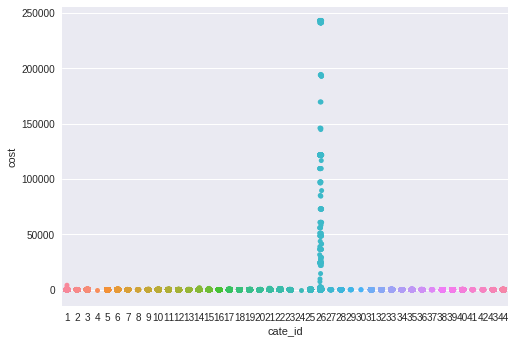

In [131]:
cost_per_month_cate=df_t_order.groupby(['month','cate_id'], as_index=False)['cost'].sum()
#cost_per_month_cate.head()
sns.stripplot(x='cate_id',y='cost',data=df_t_order[['cate_id','cost']], jitter=True)
plt.show()

In [359]:
cost_per_month_cate[cost_per_month_cate['cate_id']==26]

,month,cate_id,cost
23,8,26,4.632873e+06
62,9,26,4.783511e+06
104,10,26,8.463916e+06
142,11,26,9.836964e+06


In [325]:
train.head()

,age,sex,is_loaner,cate_1,cate_2,cate_3,cate_4,cate_5,cate_6,cate_7,...,cate_36,cate_37,cate_38,cate_39,cate_40,cate_41,cate_42,cate_43,cate_44,loan_amount
0,30,1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,4.633695
1,40,1,0,2.106085,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,35,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,4.501092,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,6.405333
3,25,1,0,2.428956,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,2.722706,0.0,0.0,0.0,2.520309,0.000000
4,35,1,0,2.630798,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,2.766518,0.000000


(272718, 48)
(272718, 48)


In [140]:
df_t_loan.head()

,Unnamed: 0,uid,loan_time,loan_amount,plannum,month,day,weekday
0,0,12135,2016-08-03 00:05:26,3.862595,1,8,3,2
1,1,41403,2016-08-03 00:13:25,5.584137,3,8,3,2
2,2,74458,2016-08-03 00:13:58,4.723017,1,8,3,2
3,3,12959,2016-08-03 00:19:33,3.862595,1,8,3,2
4,4,89641,2016-08-03 00:23:13,4.292651,1,8,3,2


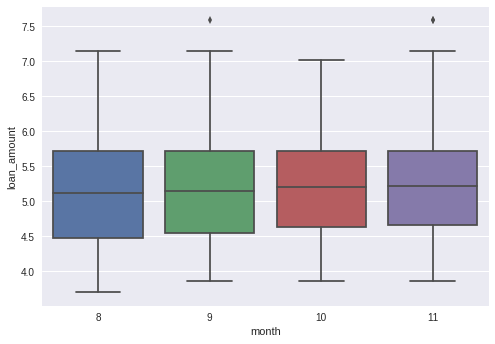

In [153]:
loan_grouped=df_t_loan.groupby(['uid','month'], as_index=False)['loan_amount'].mean()
sns.boxplot(x='month', y='loan_amount', data=loan_grouped)
plt.show()

In [151]:
df_t_loan.head()

,Unnamed: 0,uid,loan_time,loan_amount,plannum,month,day,weekday
0,0,12135,2016-08-03 00:05:26,3.862595,1,8,3,2
1,1,41403,2016-08-03 00:13:25,5.584137,3,8,3,2
2,2,74458,2016-08-03 00:13:58,4.723017,1,8,3,2
3,3,12959,2016-08-03 00:19:33,3.862595,1,8,3,2
4,4,89641,2016-08-03 00:23:13,4.292651,1,8,3,2


In [155]:
df_t_loan[df_t_loan['loan_amount']>7.5]#).sort_values('uid', axis=1)

,Unnamed: 0,uid,loan_time,loan_amount,plannum,month,day,weekday
32067,32067,81641,2016-11-25 10:53:52,7.584062,1,11,25,4
45828,45828,81641,2016-09-14 13:49:51,7.584062,1,9,14,2
164671,164671,10071,2016-11-15 16:53:50,7.584062,6,11,15,1


In [ ]:
cost_per_month_cate=df_t_loan.groupby(['month','cate_id'], as_index=False)['cost'].sum()
#cost_per_month_cate.head()
sns.stripplot(x='cate_id',y='cost',data=df_t_order[['cate_id','cost']], jitter=True)
plt.show()

In [617]:
#only use columns of type float to calculate corr
def corr_heatmap(df):
    colormap=plt.cm.viridis
    plt.figure(figsize=(15,15))
    plt.title('correlation of features', y=1.05, size=15)
    sns.heatmap(df.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()

def multicollinearity(df):
    corr=df.corr()
    corr.loc[:,:]=np.tril(corr, k=-1)  #below main lower triangle of an array
    corr=corr.stack()
    return corr[(corr>0.55) | (corr< -0.55)]
print(multicollinearity(user_loan8))   

param_3      param_1      0.709893
param_13     param_10     0.564308
param_19     param_7      0.654848
param_28     param_16     0.550910
param_30     param_29     0.564667
param_34     param_19     0.622757
param_38     param_19     0.595422
param_39     param_19     0.590336
             param_38     0.992655
param_40     param_7      0.661216
             param_19     0.801885
             param_38     0.710753
             param_39     0.705194
param_45     param_19     0.645213
loan_amount  is_loaner    0.700968
dtype: float64


In [ ]:
#evaluation metrics
def standard_error(ypred, ytest):
    sum_value=0
    for p, t in zip(ypred, ytest):
        sum_value+=(p-t)**2
    return ((sum_value/len(y_test))**1/2)

In [12]:
#get click times and click page from click data
click_count=df_t_click.groupby(['uid','pid','param','month']).agg({'click_time':'count'}).reset_index()

#get average cost per user every month
df_t_order['cost']=df_t_order['price']*df_t_order['qty']
cost_avg_month=df_t_order.groupby(['uid','cate_id','month']).agg({'cost':'mean'}).reset_index()

#calculate overall loan amount and loan times for every user
loan_sum_avg=df_t_loan.groupby(['uid', 'month']).agg({'loan_amount':'avg', 'loan_time':'count'}).reset_index()
#loan_sum_avg['avg']=loan_sum_avg['loan_amount']/loan_sum_avg['loan_time']

#not sure if this will help by using loan_sum/cost

In [19]:
merge1=click_count.merge(cost_avg_month, how='outer', on=['uid','month']).merge(loan_sum_avg, how='outer', on=['uid','month'])

In [23]:
#merge1.drop('loan_amount',axis=1, inplace=True)

In [31]:
merge1[['cost','loan_time','avg']]=merge1[['cost','loan_time','avg']].fillna(0)
merge1.isnull().sum()

uid                0
pid           246015
param         246015
month              0
click_time    246015
cate_id       219382
cost               0
loan_time          0
avg                0
dtype: int64

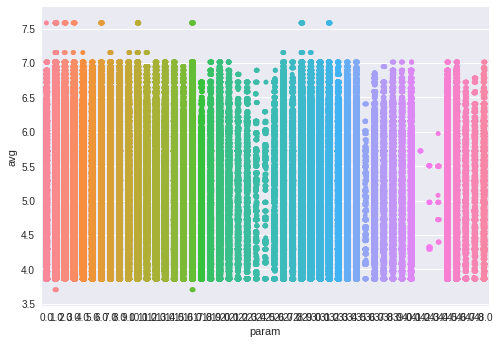

In [159]:
dummy1=merge1[merge1['loan_time']>0]
#grouped_dummy1=dummy1.groupby(['param'], as_index=False)['avg'].sum()
sns.stripplot(x='param',y='avg',data=dummy1, jitter=True)
plt.show()

In [160]:
df_t_loan.head()

,Unnamed: 0,uid,loan_time,loan_amount,plannum,month,day,weekday
0,0,12135,2016-08-03 00:05:26,3.862595,1,8,3,2
1,1,41403,2016-08-03 00:13:25,5.584137,3,8,3,2
2,2,74458,2016-08-03 00:13:58,4.723017,1,8,3,2
3,3,12959,2016-08-03 00:19:33,3.862595,1,8,3,2
4,4,89641,2016-08-03 00:23:13,4.292651,1,8,3,2


In [161]:
df_t_click.head()

,Unnamed: 0,uid,click_time,pid,param,month,day,weekday
0,0,12177,2016-10-04 12:22:30,1,19,10,4,1
1,1,29226,2016-10-04 12:18:42,6,1,10,4,1
2,2,37351,2016-10-04 12:18:41,10,16,10,4,1
3,3,82053,2016-10-04 12:18:16,1,40,10,4,1
4,4,82053,2016-10-04 12:18:46,1,40,10,4,1


In [36]:
#fill pid=null as a dummy value
#merge1[merge1['pid']==0]
merge1.pid=merge1.pid.fillna(0)
#sorted(merge1.param.unique()) #belongs to [1,48]
merge1.param=merge1.param.fillna(0)
merge1.cate_id=merge1.cate_id.fillna(0)
merge1.click_time=merge1.click_time.fillna(0)

In [63]:
len(merge1.uid)

9560149

In [64]:
merge1.head()

,uid,pid,param,month,click_time,cate_id,cost,loan_time,avg
0,1,5.0,10.0,8,2.0,11.0,4.043950,0.0,0.0
1,1,5.0,10.0,8,2.0,15.0,2.066718,0.0,0.0
2,1,5.0,10.0,8,2.0,22.0,3.602841,0.0,0.0
3,1,5.0,10.0,8,2.0,40.0,3.292030,0.0,0.0
4,1,6.0,1.0,8,2.0,11.0,4.043950,0.0,0.0


In [18]:
loan_sum_avg.head()

,uid,month,loan_amount,loan_time,avg
0,4,8,10.445692,2,5.222846
1,4,10,10.989579,2,5.494789
2,4,11,4.723017,1,4.723017
3,5,11,6.584075,1,6.584075
4,6,9,6.266691,1,6.266691


In [26]:
len(df_t_loan['uid'].unique())

36697

In [29]:
len(order_loan)-5299537

130392

In [ ]:
# get highly correlated data


In [113]:
order_no_loan=order_loan[order_loan['avg'].isnull()]

In [114]:
order_and_loan=order_loan[order_loan['avg'].notnull()]

In [115]:
order_and_loan.drop(order_and_loan[(train_master.ThirdParty_Info_Period6_1 > 250) & (train_master.target == 1)].index, inplace=True)

,uid,month,cost,loan_amount,loan_time,avg
12,4,08,3.257459,10.445692,2.0,5.222846
14,4,10,3.158812,10.989579,2.0,5.494789
15,4,11,2.866304,4.723017,1.0,4.723017
19,5,11,2.914048,6.584075,1.0,6.584075
21,6,09,2.677232,6.266691,1.0,6.266691
23,6,11,3.501961,6.266691,1.0,6.266691
61,19,09,3.721151,8.724196,2.0,4.362098
63,20,08,4.405187,30.573341,6.0,5.095557
64,20,09,4.553358,17.308068,3.0,5.769356
72,23,08,2.893730,19.312973,5.0,3.862595


In [138]:
order_loan_user=df_t_user[['uid','age','sex']].merge(order_loan, how='left', on=['uid'])

In [139]:
order_loan_user.head()

,uid,age,sex,month,cost,loan_amount,loan_time,avg
0,26308,30,1,08,4.070415,8.585611,2.0,4.292806
1,26308,30,1,10,3.592440,36.063368,8.0,4.507921
2,78209,40,1,08,2.924081,NaN,NaN,NaN
3,78209,40,1,09,2.592643,NaN,NaN,NaN
4,78209,40,1,10,3.249731,NaN,NaN,NaN


In [140]:
order_loan_user.shape

(311189, 8)

In [127]:
order_and_loan[order_and_loan['cost']>5000]

,uid,month,cost,loan_amount,loan_time,avg
34297,10106,09,24342.763175,5.885770,1.0,5.885770
111220,32692,11,9331.991503,4.723017,1.0,4.723017
121393,35703,09,12160.106433,3.862595,1.0,3.862595
177442,52214,08,9740.428844,6.316423,1.0,6.316423
208128,61195,11,5325.035165,6.464551,1.0,6.464551
244187,71797,10,19768.067718,5.153538,1.0,5.153538
273119,80328,08,5048.770296,6.052441,1.0,6.052441
273120,80328,09,11096.615408,6.121545,1.0,6.121545


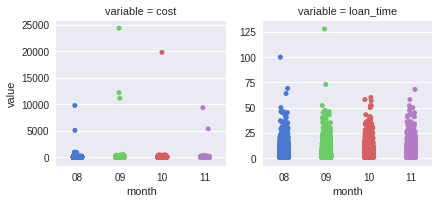

In [129]:
#outlier clean
import seaborn as sns
numerical_features=['cost','loan_time']
melt = pd.melt(order_and_loan, id_vars=['month'], value_vars = [f for f in numerical_features])
#order_and_loan.boxplot(column='cost')
g = sns.FacetGrid(data=melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.stripplot, 'month', 'value', jitter=True, palette="muted")
plt.show()

In [3]:
order_and_loan[order_and_loan]

In [22]:
.drop(train_master[(train_master.ThirdParty_Info_Period6_1 > 250) & (train_master.target == 1)].index, inplace=True)

In [23]:
loan_sum.head()

,uid,year_month,loan_amount,loan_time,avg
0,4,2016-08,10.445692,2,5.222846
1,4,2016-10,10.989579,2,5.494789
2,4,2016-11,4.723017,1,4.723017
3,5,2016-11,6.584075,1,6.584075
4,6,2016-09,6.266691,1,6.266691


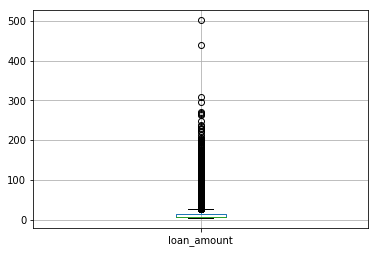

In [20]:
import matplotlib.pyplot as plt
loan_sum.boxplot(column='loan_amount')
plt.show()

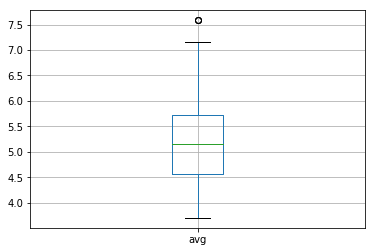

In [24]:
loan_sum.boxplot(column='avg')
plt.show()

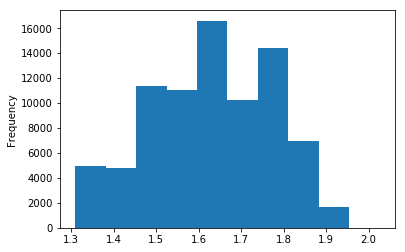

In [36]:
log_avg=np.log(loan_sum['avg'])
log_avg.plot(kind='hist')
plt.show()

In [38]:
log_avg.describe()

count    82063.000000
mean         1.628067
std          0.141988
min          1.309497
25%          1.520254
50%          1.639683
75%          1.744453
max          2.026049
Name: avg, dtype: float64

In [28]:
loan_sum[loan_sum['avg']>7.5]

,uid,year_month,loan_amount,loan_time,avg
9013,10071,2016-11,7.584062,1,7.584062
73776,81641,2016-09,7.584062,1,7.584062
73777,81641,2016-11,7.584062,1,7.584062


In [21]:
loan_sum[loan_sum['loan_amount']>300]

,uid,year_month,loan_amount,loan_time
15370,17103,2016-09,307.989147,73
29458,32940,2016-08,438.669603,100
29459,32940,2016-09,501.911225,128


In [30]:
loan_sum[loan_sum['uid']==81641]

,uid,year_month,loan_amount,loan_time,avg
73776,81641,2016-09,7.584062,1,7.584062
73777,81641,2016-11,7.584062,1,7.584062


In [232]:
df_t_loan_avg=df_t_loan_sum_by_day.groupby(['uid'], as_index=False)['loan_amount'].mean()

In [254]:
#check overall loan amout > limit
merge_user=df_t_loan_sum_by_day.merge(df_t_user, on=['uid'], how='right')

In [233]:
df_t_loan_avg.head()

,uid,loan_amount
0,4,5.231658
1,5,6.584075
2,6,6.266691
3,17,5.657311
4,19,4.869989


In [234]:
#save to csv
import csv
df_csv=df_t_loan_avg[['uid','loan_amount']]
df_csv.to_csv('initial.csv')

In [267]:
merge_user['loan_amount']=merge_user.loan_amount.fillna(0)

In [269]:
merge_user.head()

,uid,loan_time,loan_amount,ym,age,sex,active_date,limit
0,4,2016-08-05,5.292154,2016-08,30,1,2016-03-26,5.292154
1,4,2016-08-12,5.153538,2016-08,30,1,2016-03-26,5.292154
2,4,2016-10-14,5.153538,2016-10,30,1,2016-03-26,5.292154
3,4,2016-10-29,5.836041,2016-10,30,1,2016-03-26,5.292154
4,4,2016-11-27,4.723017,2016-11,30,1,2016-03-26,5.292154


In [270]:
merge_user_groupby_month=merge_user.groupby(['uid'], as_index=False)['loan_amount'].mean()

In [272]:
merge_user_groupby_month.to_csv('initial.csv')

In [192]:
df_t_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


In [27]:
df_t_loan_sum.shape

(19197, 3)

In [77]:
df_t_order.head()

,uid,buy_time,price,qty,cate_id,discount,total_price
0,45370,2016-11-23,3.995009,1,22,0.0,3.995009
1,66975,2016-11-23,3.269410,1,26,0.0,3.269410
2,75358,2016-11-23,2.255235,1,14,0.0,2.255235
3,40597,2016-11-23,1.635284,1,20,0.0,1.635284
4,83886,2016-11-23,1.920573,2,22,0.0,3.841145


In [76]:
df_t_order['total_price']=df_t_order['price']*df_t_order['qty']

In [199]:
df_t_order.groupby(['uid','buy_time'])

,uid,buy_time,price,qty,cate_id,discount,total_price,recent_flag
0,45370,2016-11-23,3.995009,1,22,0.0,3.995009,4
1,66975,2016-11-23,3.269410,1,26,0.0,3.269410,4
2,75358,2016-11-23,2.255235,1,14,0.0,2.255235,4
3,40597,2016-11-23,1.635284,1,20,0.0,1.635284,4
4,83886,2016-11-23,1.920573,2,22,0.0,3.841145,4


In [197]:
merge_order=df_t_loan.merge(df_t_order, on=['uid'], how='left')

In [ ]:
merge_user=merge_order.merge(df_t_order,on=['uid'], how='left')
merge_all=merge_user.merge(df_t_click,on=['uid'], how='left')

In [98]:
date_min=df_t_order.buy_time.min()
date_max=df_t_order.buy_time.max()
def f(row):
    if row['buy_time']>'2016-11-01':
        val=4
    elif row['buy_time']>'2016-10-01':
        val=3
    elif row['buy_time']>'2016-09-01':
        val=2
    else:
        val=1
    return val
df_t_order['recent_flag']=df_t_order.apply(f, axis=1)
recency=df_t_order.groupby(['uid','cate_id'], as_index=False)['recent_flag'].max()

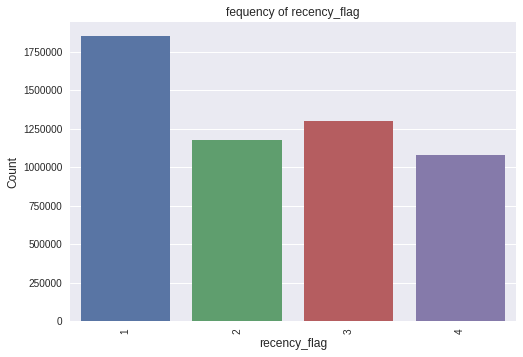

In [88]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.countplot(x='recent_flag', data=df_t_order)
plt.ylabel('Count', fontsize=12)
plt.xlabel('recency_flag', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('fequency of recency_flag')
plt.show()

In [111]:
#calculate purchase frequency as per uid and cate_id
frequency=df_t_order.groupby(['uid', 'cate_id'], as_index=False)['buy_time'].count()
freq=frequency['buy_time'].drop_duplicates()
freq_band=pd.qcut(freq, 5)
freq_band=freq_band.drop_duplicates()

In [112]:
freq_band

0         (0.999, 81.8]
435       (81.8, 162.6]
1180     (162.6, 244.4]
1277     (244.4, 375.4]
5710    (375.4, 7467.0]
Name: buy_time, dtype: category
Categories (5, interval[float64]): [(0.999, 81.8] < (81.8, 162.6] < (162.6, 244.4] < (244.4, 375.4] < (375.4, 7467.0]]

In [114]:
#rate user as per purchase frequency band
def freq_flag(row):
    if row['buy_time']>350:
        val=5
    elif row['buy_time']>250:
        val=4
    elif row['buy_time']>150:
        val=3
    elif row['buy_time']>80:
        val=2
    elif row['buy_time']>0.5:
        val=1
    return val
frequency['freq_flag']=frequency.apply(freq_flag, axis=1)

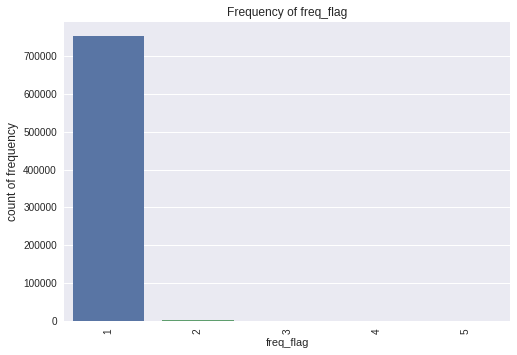

In [121]:
#check distribution of frequency flags
def countPlot(f, data):
    sns.countplot(x=f, data=data)
    plt.ylabel('count of frequency',fontsize=12)
    plt.xlabel(f)
    plt.xticks(rotation='vertical')
    plt.title('Frequency of freq_flag')
    return plt.show()
countPlot('freq_flag', frequency)
#most of the customers buy less than 81 times

In [164]:
money=df_t_order.groupby(['uid','cate_id'], as_index=False)['total_price'].sum()
unique_money=money[money['total_price']>0].drop_duplicates()
unique_money['monetary_band']=pd.qcut(unique_money['total_price'],10)
unique_money=unique_money[['monetary_band']].drop_duplicates()
unique_money.sort_values(by='monetary_band')

,monetary_band
29,"(0.00518, 3.024]"
3,"(3.024, 4.106]"
10,"(4.106, 5.723]"
6,"(5.723, 7.752]"
14,"(7.752, 10.583]"
1,"(10.583, 14.479]"
22,"(14.479, 20.449]"
16,"(20.449, 30.656]"
0,"(30.656, 54.716]"
2,"(54.716, 8603511.3]"


In [191]:
df_t_loan[df_t_loan['uid']==48222]

,uid,loan_time,loan_amount,plannum


In [165]:
def money_flag(row):
    if row['total_price']>30000:
        val=10
    elif row['total_price']>20000:
        val=9
    elif row['total_price']>15000:
        val=8
    elif row['total_price']>10000:
        val=7
    elif row['total_price']>7000:
        val=6
    elif row['total_price']>5000:
        val=5
    elif row['total_price']>4000:
        val=4
    elif row['total_price']>3000:
        val=3
    elif row['total_price']>2000:
        val=2
    else:
        val=1
    return val
money['monetary_flag']=money.apply(money_flag, axis=1)

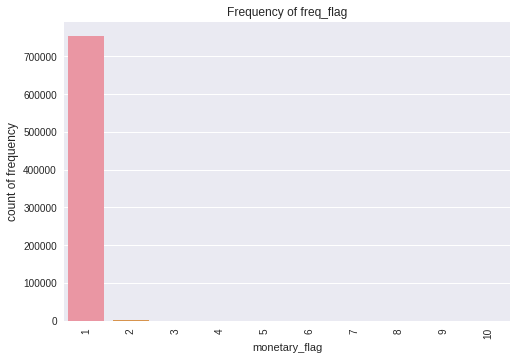

In [167]:
countPlot('monetary_flag', money)

In [161]:
#merge
df_t_order_all=pd.merge(recency, frequency, on=['uid','cate_id'], how='left')
df_t_order_all=pd.merge(df_t_order_all, money, on=['uid','cate_id'], how='left')

In [162]:
df_t_order_all.head()

,uid,cate_id,recent_flag,buy_freq,freq_flag,total_price,monetary_flag
0,1,1,3,4,1,39.410450,1
1,1,11,4,3,1,11.379929,1
2,1,15,4,19,1,57.879701,1
3,1,19,3,1,1,3.974636,1
4,1,20,4,4,1,12.446902,1


In [125]:
frequency.rename(columns={'buy_time':'buy_freq'}, inplace=True)

In [126]:
frequency.head()

,uid,cate_id,buy_freq,freq_flag
0,1,1,4,1
1,1,11,3,1
2,1,15,19,1
3,1,19,1,1
4,1,20,4,1


In [72]:
#buy count as per uid and cate_id
df_t_order.groupby(['uid','cate_id']).apply(lambda x:x['buy_time'].shape[0])

uid    cate_id
1      1           4
       11          3
       15         19
       19          1
       20          4
       22         22
       25          1
       35         13
       36          1
       40          1
2      2           1
       3           4
       11          2
       18          2
       21          2
       23          1
       33          9
       36          3
       44          2
3      2           4
       6           1
       10          3
       15          6
       21          1
       35          2
       36          1
       44          8
4      3           1
       13          3
       15          1
                  ..
90990  1          21
       6           4
       20          1
       21          1
       22          5
       26         19
       33          7
       40          2
       44         17
90991  26          1
       33          1
90992  1           8
       10          2
       11          7
       12          6
       19          

In [7]:
df_t_user.head()

,uid,age,sex,active_date,limit
0,26308,30,1,2016-02-16,5.974677
1,78209,40,1,2016-02-21,5.292154
2,51930,35,1,2016-04-19,6.292055
3,10113,25,1,2016-03-12,6.292055
4,17067,35,1,2016-02-16,5.974677


In [49]:
df_t_user.groupby(['sex','age'])['limit'].describe()

count      mean       std       min       25%       50%       75%  \
sex age                                                                        
1   20     102.0  5.363388  0.239675  5.292154  5.292154  5.292154  5.292154   
    25   12784.0  5.740385  0.374667  5.292154  5.292154  5.722768  5.974677   
    30   28212.0  5.883851  0.356665  5.292154  5.722768  5.974677  6.153414   
    35   21577.0  5.984442  0.328661  5.292154  5.722768  5.974677  6.292055   
    40   10400.0  6.012158  0.315117  5.292154  5.722768  6.153414  6.292055   
    45    3919.0  6.001346  0.315222  5.292154  5.722768  6.153414  6.292055   
    50    1411.0  5.999236  0.317902  5.292154  5.722768  6.153414  6.292055   
2   20      31.0  5.751750  0.444009  5.292154  5.292154  5.974677  6.222734   
    25    1668.0  5.724576  0.380107  5.292154  5.292154  5.722768  5.974677   
    30    4954.0  5.864643  0.364270  5.292154  5.722768  5.974677  6.153414   
    35    3653.0  5.938747  0.341603  5.292154  5.722768  5.974677  6.292055   
    40    1470.0  5.983339  0.331297  5.292154  5.722768  5.974677  6.292055   
    45     553.0  5.956529  0.339867  5.292154  5.722768  5.974677  6.292055   
    50     259.0  5.966560  0.314592  5.292154  5.722768  5.974677  6.292055   

              max  
sex age            
1   20   6.292055  
    25   6.292055  
    30   6.292055  
    35   6.292055  
    40   6.292055  
    45   6.292055  
    50   6.292055  
2   20   6.292055  
    25   6.292055  
    30   6.292055  
    35   6.292055  
    40   6.292055  
    45   6.292055  
    50   6.292055

In [8]:
df_t_click.head()

,uid,click_time,pid,param
0,12177,2016-10-04 12:22:30,1,19
1,29226,2016-10-04 12:18:42,6,1
2,37351,2016-10-04 12:18:41,10,16
3,82053,2016-10-04 12:18:16,1,40
4,82053,2016-10-04 12:18:46,1,40


In [32]:
type(df_t_click.click_time.values[0])

str

In [10]:
df_t_loan.isnull().sum()

uid            0
loan_time      0
loan_amount    0
plannum        0
dtype: int64

In [11]:
df_t_loan_sum.isnull().sum()

uid         0
month       0
loan_sum    0
dtype: int64

In [12]:
df_t_order.isnull().sum()

uid           0
buy_time      0
price       411
qty           0
cate_id       0
discount      0
dtype: int64

In [38]:
len(df_t_user.uid.unique())

90993

In [22]:
by_uid_click=df_t_click.groupby('uid')

78439

In [23]:
df_t_click.shape

(10933016, 4)

In [24]:
import datetime
def epoch_time(date_str, date_format='%Y-%m-%d %H:%M:%S'):
    return int(datetime.datetime.strptime(date_str, date_format).strftime("%s"))

def click_aggr(group):
    click_num_all = group.shape[0]
    click_num_day=group['click_time']
    click_num_week=
    click_num_month=
    loginfo_LogInfo1_unique_num = group[''].unique().shape[0]
    loginfo_active_day_num = group[''].unique().shape[0]
    min_day = epoch_time(np.min(group['click_time']))
    max_day = epoch_time(np.max(group['click_time']))
    gap_day = round((max_day[0] - min_day[0]) / 86400)

    indexes = {
        'click_num_all': click_num_all, 
        'click_num_day': loginfo_LogInfo1_unique_num, 
        'click_num_week': loginfo_active_day_num, 
        'click_num_month': gap_day, 
        'recent_click_day': max_day
    }
    
    # TODO every individual LogInfo1,LogInfo2 count

    def sub_aggr_loginfo(sub_group):
        return sub_group.shape[0]

    sub_group = group.groupby(by=['LogInfo1', 'LogInfo2']).apply(sub_aggr_loginfo)
    indexes['loginfo_LogInfo12_unique_num'] = sub_group.shape[0]
    return Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])
    
df_t_click['click_date']=df_t_click.apply(lambda x: x.split()[0])
df_click_grouped = df_t_click.groupby(by=['uid']).apply(click_aggr)
df_click_grouped.head()

ModuleNotFoundError: No module named 'arrow'

In [66]:
indexes={'a':2,'b':3}
pd.Series(data=[indexes[c] for c in indexes], index=[c for c in indexes])

a    2
b    3
dtype: int64

In [69]:
'2016-08-10 09:11:32'.split()[0]

'2016-08-10'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#make a classification model and accessing performance
def classification_model(model, data, features, outcome):
    model.fit(data[features], data[outcome])
    predictions=model.predict(data[features])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print('accuracy: %s' % '{0:.3%}'.format(accuracy))
    
    #k-fold cross-validation with 5 folds
    kf=KFold(data.shape[0],n_folds=5)
    error=[]
    for train, test in kf:
        train_features=(data[features].iloc[train,:])
        train_target=data[outcome].iloc[train]
        model.fit(train_features, train_target)
        error.append(model.score(data[features].iloc[test,:], data[outcome].iloc[test]))
    print('cross validation score: %s' % '{0:.3%}'.format(np.mean(error)))
    #fit the model again to be referred outside the function
    model.fit(data[features], data[outcome])
    
model=LogisticRegression()
features=['credit']
classification_model(model, features, 'loan')

In [ ]:
def modelfit(model, train, test, features,output, performCV=True, printFeatureImportance=True, cv_fold=5):
    model.fit(train[features], train[output])
    train_predictions=model.predict(train[features])
    train_prob=model.predict_proba(train[features])[:,1]
    if performCV:
        cv_score=cross_validation.cross_val_score(model, train[features], train[output], cv=cv_fold,\
                                                 scoring='roc_auc')
    print('model report')
    print('Accuracy: %.4g' % metrics.accuracy_score(train[output].values, train_predictions))
    print('AUC score (Train): %f' % metrics.roc_auc_score(train[output], train_prob))
    
    if performCV:
        print('CV score: Mean - %.7g | std - %.7g | min-%.7g | max-%.7g' % (np.mean(cv_score), \
                                                                            np.std(cv_score), \
                                                                            np.min(cv_score),\
                                                                           np.max(cv_score)))
    if printFeatureImportance:
        feat_imp=pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
        feat.imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [ ]:
#grid search
params=[{'n_estimators':[50000], 'learning_rate':[2**i for i in np.arange(-10, -9, .25)],\
        'max_features':['log2'], 'max_depth':[7,]}]
model=GradientBoostingClassifier(random_state=1, verbose=1)
gscv=GridSearchCv(method, params, scoring='roc_auc', verbose=verbose, n_jobs=5)
gscv.fit(train_X.toarray(), train_y)
if verbose:
    for params, mean_score, all_scores in gscv.grid_scores_:
        logger.info('params: {param}'.format(parmasgscv.best_params_))
        logger.info('score:{params}'.format(params=gscv.best_score_))
pred=gscv.best_estimator_.predict_proba(test_X.toarray())

In [ ]:
#evaluate features
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
import scikitplot.plotters as skplt

def evaluate_features(x,y, clf=None):
    if clf==None:
        clf=LogisticsRegression()
    probas=cross_val_predict(clf, x, y, cv=StratifiedKFold(random_state=8)\
                            n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices=np.argmax(probas, axis=1)
    classes=np.unique(y)
    preds=classes[pred_indices]
    print('log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.plot_confusion_matrix(y, preds)